## Day 30 - A Map

### Data

My course of Geopython for Geographers at the University of Tartu, Estonia

- https://kodu.ut.ee/~kmoch/geopython2020/L5/earthpy.html
- https://kodu.ut.ee/~kmoch/geopython2020/L6/static-maps.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import rasterio as rio

dtm = 'dem.tif'

# Open the DEM with Rasterio
src = rio.open(dtm)
elevation = src.read(1)

In [2]:
import geopandas as gpd

catchments = gpd.read_file('porijogi_sub_catchments.geojson')

subcatch = catchments.loc[catchments['NAME_1']=='Idaoja']

# protected species under class 3 monitoring sightings
species_fp = "category_3_species_porijogi.gpkg"

species_data = gpd.read_file(species_fp, layer='category_3_species_porijogi', driver='GPKG')

In [3]:
pip_mask = species_data.within(subcatch.loc[0, 'geometry'])
pip_data = species_data.loc[pip_mask]

In [4]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import collections

patchList = []

data_key = mpatches.Patch(color="gold", label="Selected Idaoja species")

patchList.append(data_key)

In [26]:
hillshade = es.hillshade(elevation, azimuth=210, altitude=30)

In [27]:
# to define the bounds of the map (important for the raster layers plot)
extent = (src.bounds.left, src.bounds.right, src.bounds.bottom, src.bounds.top)

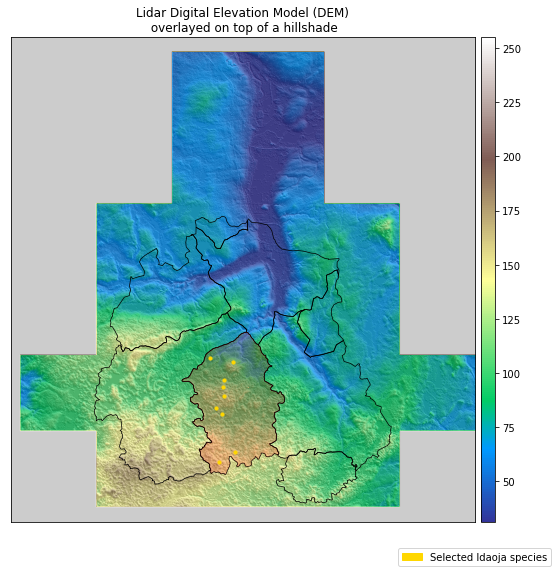

In [28]:
fig, ax = plt.subplots(figsize=(12,8))

ep.plot_bands(elevation, ax=ax, cmap="terrain", extent=extent, title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade" )

ep.plot_bands(hillshade, cmap='Greys', extent=extent, ax=ax, alpha=0.3, cbar=None)

catchments.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

subcatch.plot(ax=ax, facecolor='red', alpha=0.2)

pip_data.plot(ax=ax, color='gold', markersize=10, legend=True)

plt.legend(handles=patchList, loc='lower center', bbox_to_anchor=(-0.5, -0.1), ncol=1)

plt.tight_layout()

plt.savefig('../source/_static/day-30-map.png', bbox_inches='tight')

In [20]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# Stack the Landsat 8 bands
landsat_path = glob("Landsat8_pori__sr*.tif")
landsat_path.sort()

for idx, f in enumerate(landsat_path):
    print(f"{idx}: {f}")

arr_st_l8, meta_l8 = es.stack(landsat_path, nodata=-9999)

0: Landsat8_pori__sr_band1.tif
1: Landsat8_pori__sr_band2.tif
2: Landsat8_pori__sr_band3.tif
3: Landsat8_pori__sr_band4.tif
4: Landsat8_pori__sr_band5.tif
5: Landsat8_pori__sr_band6.tif
6: Landsat8_pori__sr_band7.tif


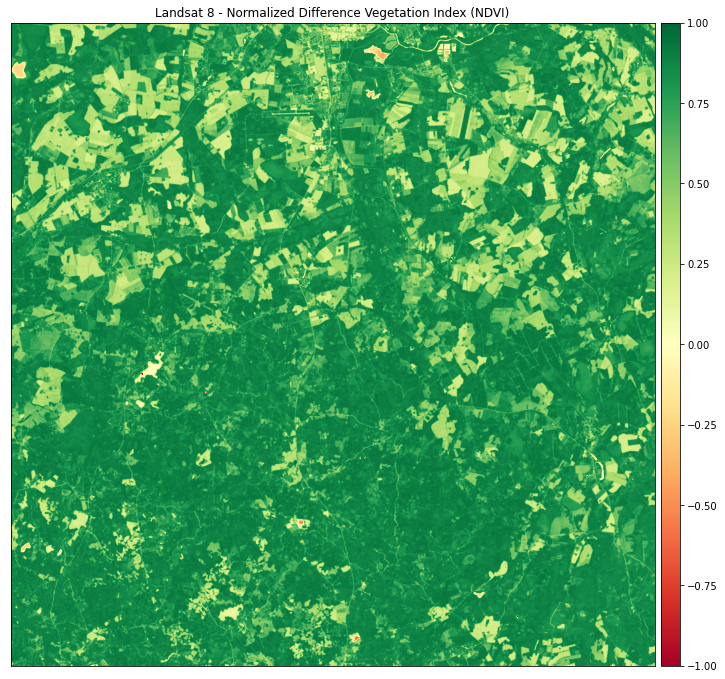

<Figure size 432x288 with 0 Axes>

In [21]:
b1 = arr_st_l8[4]
b2 = arr_st_l8[3]

ndvi_l8 = es.normalized_diff(b1, b2)

title = "Landsat 8 - Normalized Difference Vegetation Index (NDVI)"

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi_l8, cmap="RdYlGn", cols=1, title=title, vmin=-1, vmax=1)

plt.tight_layout()

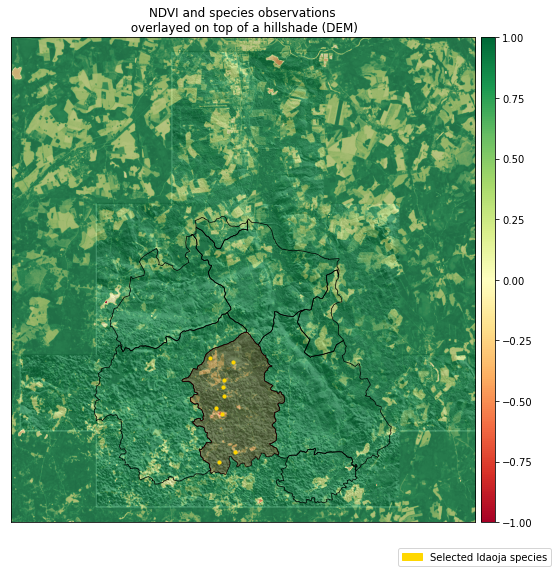

In [29]:
fig, ax = plt.subplots(figsize=(12,8))

# ep.plot_bands(elevation, ax=ax, cmap="terrain", extent=extent, title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade" )
ep.plot_bands(ndvi_l8, ax=ax, cmap="RdYlGn", vmin=-1, vmax=1, extent=extent, title="NDVI and species observations\n overlayed on top of a hillshade (DEM)")

ep.plot_bands(hillshade, cmap='Greys', extent=extent, ax=ax, alpha=0.3, cbar=None)

catchments.plot(ax=ax, facecolor="none", edgecolor='black', lw=0.7)

subcatch.plot(ax=ax, facecolor='red', alpha=0.2)

pip_data.plot(ax=ax, color='gold', markersize=10, legend=True)

plt.legend(handles=patchList, loc='lower center', bbox_to_anchor=(-0.5, -0.1), ncol=1)

plt.tight_layout()

plt.savefig('../source/_static/day-30-map.png', bbox_inches='tight')